In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm
from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [2]:
covid = pd.read_csv('covid_19_data.csv')

In [3]:
#Dropping column as SNo is of no use, and "Province/State" contains too many missing values
covid.drop(["SNo"],1,inplace=True)

In [4]:
#Converting "Observation Date" into Datetime format
covid["ObservationDate"]=pd.to_datetime(covid["ObservationDate"])

In [5]:
#Grouping different types of cases as per the date
datewise=covid.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [6]:
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"]=datewise["Days Since"].dt.days

In [7]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.90)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.90):]
model_scores=[]

#### Confirmed Cases

In [8]:
lin_reg=LinearRegression(normalize=True)

In [9]:
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [10]:
prediction_valid_linreg=lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [11]:
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_linreg)))
print("Root Mean Square Error for Linear Regression in Confirmed Cases : ",np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_linreg)))

Root Mean Square Error for Linear Regression in Confirmed Cases :  464611.3772587244


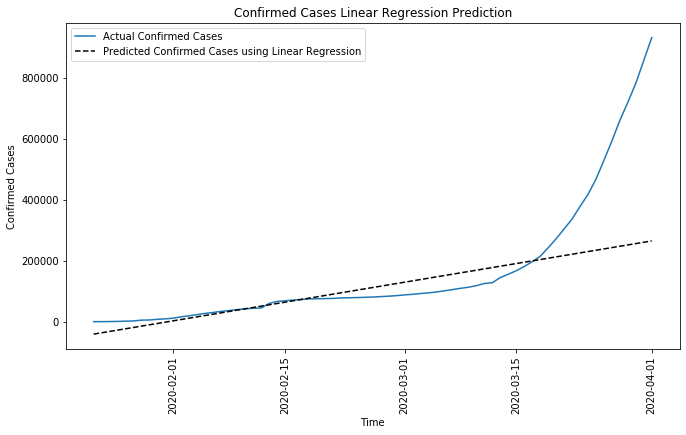

In [12]:
plt.figure(figsize=(11,6))
prediction_linreg=lin_reg.predict(np.array(datewise["Days Since"]).reshape(-1,1))
plt.plot(datewise["Confirmed"],label="Actual Confirmed Cases")
plt.plot(datewise.index,prediction_linreg, linestyle='--',label="Predicted Confirmed Cases using Linear Regression",color='black')
plt.xlabel('Time')
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases Linear Regression Prediction")
plt.xticks(rotation=90)
plt.legend()

In [13]:
new_date=[]
new_prediction_lr=[]
for i in range(1,18):
    new_date.append(datewise.index[-1]+timedelta(days=i))
    new_prediction_lr.append(lin_reg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
    
pd.set_option('display.float_format', lambda x: '%.6f' % x)
model_predictions=pd.DataFrame(zip(new_date,new_prediction_lr),columns=["Dates","Linear Regression Prediction for Confirmed Cases"])
model_predictions.head()

TypeError: data argument can't be an iterator

#### Deaths

In [ ]:
lin_reg_Death=LinearRegression(normalize=True)
lin_reg_Death.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Deaths"]).reshape(-1,1))

prediction_valid_linreg= lin_reg_Death.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Deaths"],prediction_valid_linreg)))
print("Root Mean Square Error for Linear Regression in Death Cases: ",np.sqrt(mean_squared_error(valid_ml["Deaths"],prediction_valid_linreg)))

plt.figure(figsize=(11,6))
prediction_linreg= lin_reg_Death.predict(np.array(datewise["Days Since"]).reshape(-1,1))
plt.plot(datewise["Deaths"],label="Actual Deaths Cases")
plt.plot(datewise.index,prediction_linreg, linestyle='--',label="Predicted Deaths Cases using Linear Regression",color='black')
plt.xlabel('Time')
plt.ylabel('Deaths')
plt.title("Deaths Cases Linear Regression Prediction")
plt.xticks(rotation=90)
plt.legend()

#### Recovered

In [ ]:
lin_reg_Recovered=LinearRegression(normalize=True)
lin_reg_Recovered.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Recovered"]).reshape(-1,1))

prediction_valid_linreg= lin_reg_Recovered.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Recovered"],prediction_valid_linreg)))
print("Root Mean Square Error for Linear Regression in Recovered Cases: ",np.sqrt(mean_squared_error(valid_ml["Recovered"],prediction_valid_linreg)))

plt.figure(figsize=(11,6))
prediction_linreg= lin_reg_Recovered.predict(np.array(datewise["Days Since"]).reshape(-1,1))
plt.plot(datewise["Recovered"],label="Actual Recovered Cases")
plt.plot(datewise.index,prediction_linreg, linestyle='--',label="Predicted Recovered Cases using Linear Regression",color='black')
plt.xlabel('Time')
plt.ylabel('Recovered')
plt.title("Recovered Cases Linear Regression Prediction")
plt.xticks(rotation=90)
plt.legend()